In [1]:
import re
log_path = 'G:\code\python\CryptoQuantized\log\log_2023-07-29_06-05-14.txt'
f = open(log_path)
arr = []
buy_losses = []
sell_losses = []
earns = []

is_sell = False
lines = 0
for line in open (log_path):
    lines += 1
    if "BUY, price" in line:
        buy_losses.append(float(re.search(r'loss = (.*)%', line)[1]))
    if "SELL, price" in line:
        sell_losses.append(float(re.search(r'loss = (.*)%', line)[1]))
        is_sell = True
    elif "Earn" in line:
        if is_sell:
            is_sell = False
            earns.append(float(re.search(r'Earn rate without fee: (.*)%', line)[1]))
        else:
            print(lines)

In [2]:
import numpy as np
print(f"Total buy nums: {len(buy_losses)}")
print(f"Total buy_losses: {np.sum(buy_losses) :.5f} %")
print(f"Average buy_losses: {np.mean(buy_losses) :.6f} %")
print(f"Max buy_losses: {np.max(buy_losses) :.5f} %")
print(f"Median buy_losses: {np.median(buy_losses) :.5f} %")
print()
print(f"Total sell nums: {len(sell_losses)}")
print(f"Total sell_losses: {np.sum(sell_losses) :.5f} %")
print(f"Average sell_losses: {np.mean(sell_losses) :.6f} %")
print(f"Max sell_losses: {np.max(sell_losses) :.5f} %")
print(f"Median sell_losses: {np.median(sell_losses) :.5f} %")
print()
print(f"Total earn nums: {len(earns)}")
print(f"Total earns: {np.sum(earns) :.5f} %")
print(f"Average earns: {np.mean(earns) :.6f} %")
print(f"Max earns: {np.max(earns) :.5f} %")
print(f"Min earns: {np.min(earns) :.5f} %")
print(f"Median earns: {np.median(earns) :.5f} %")

Total buy nums: 406
Total buy_losses: 0.77200 %
Average buy_losses: 0.001901 %
Max buy_losses: 0.01000 %
Median buy_losses: 0.00100 %

Total sell nums: 406
Total sell_losses: 0.00000 %
Average sell_losses: 0.000000 %
Max sell_losses: 0.00000 %
Median sell_losses: 0.00000 %

Total earn nums: 406
Total earns: -1.86500 %
Average earns: -0.004594 %
Max earns: 0.30700 %
Min earns: -0.18700 %
Median earns: -0.00550 %


In [4]:
from analysis_utils import *

<Figure size 1000x500 with 0 Axes>

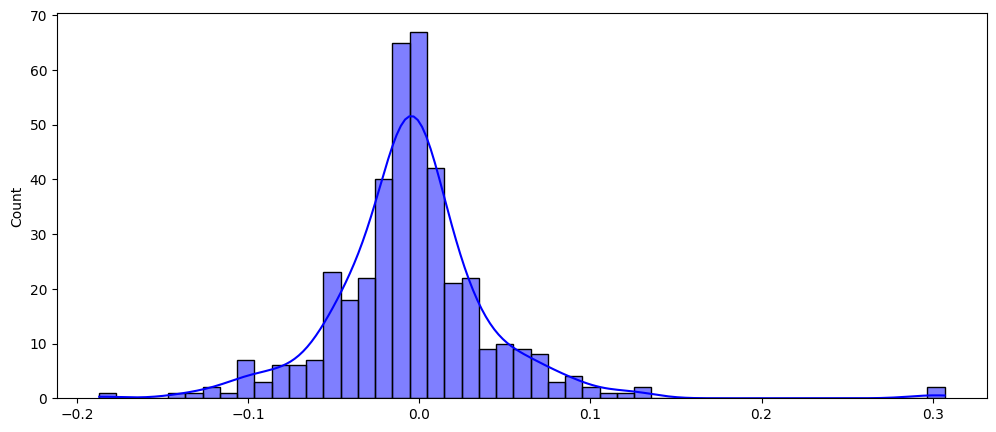

In [5]:
histplot(earns)

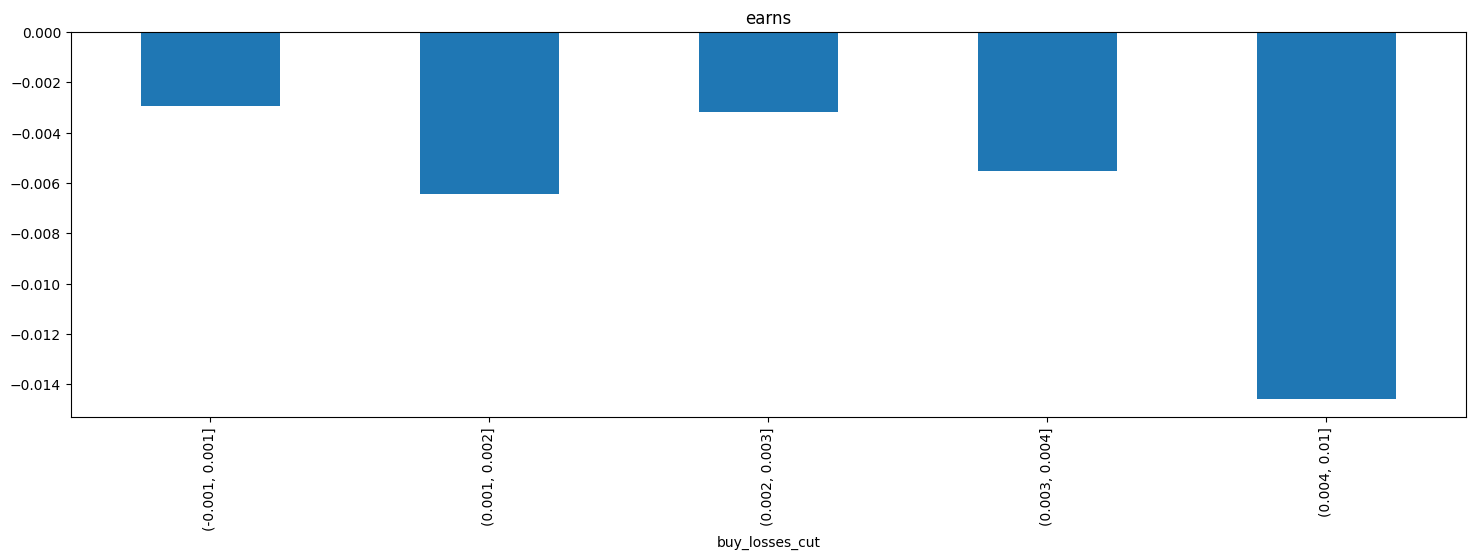

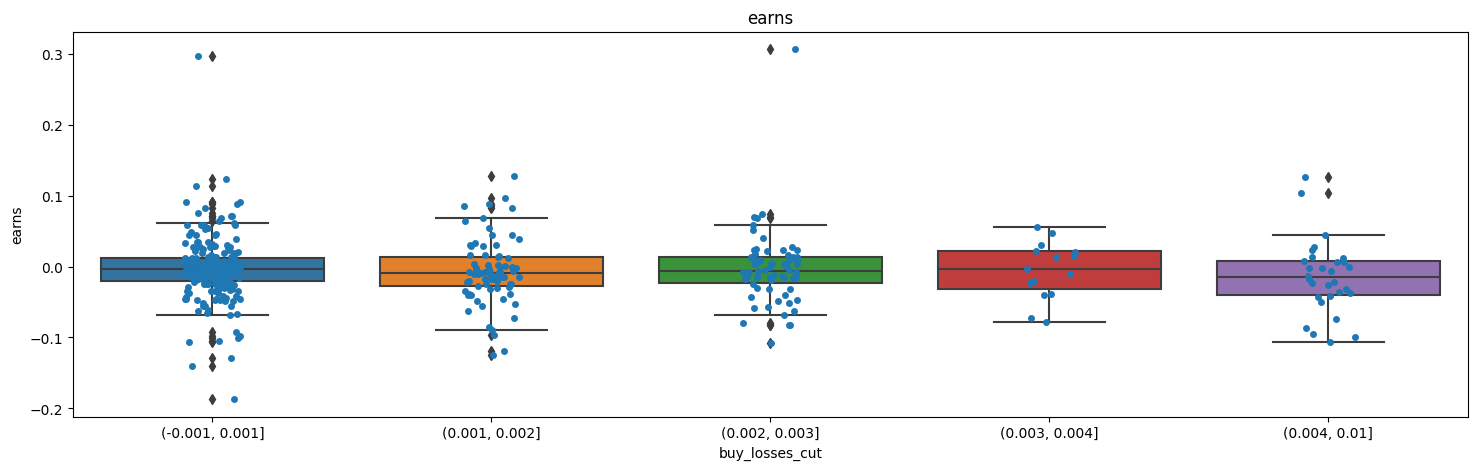

In [6]:
import pandas as pd
data = pd.DataFrame({'buy_losses': buy_losses[:len(sell_losses)], 'sell_losses': sell_losses, 'earns': earns})
plt_A_B(data, 'buy_losses', 'earns', cut_num=10)
plt_box_A_B(data, 'buy_losses', 'earns', cut_num=10)

In [7]:
data[data['buy_losses'] > 0.008]

,buy_losses,sell_losses,earns
59,0.01,0.0,0.013
139,0.01,0.0,-0.050
158,0.01,0.0,-0.037
379,0.01,0.0,-0.106
381,0.01,0.0,0.045
